In [1]:
from minio import Minio
import os

# Initialize MinIO client
client = Minio(
    "127.0.0.1:9000",  # Example: "localhost:9000"
    access_key="minioaccesskey",
    secret_key="miniosecretkey",
    secure=False  # Set to True if using https
)

In [2]:
def upload_images_to_minio(local_folder, bucket_name):
    # Check if the bucket exists, create it if it does not
    if not client.bucket_exists(bucket_name):
        client.make_bucket(bucket_name)
        print(f"Bucket '{bucket_name}' created.")

    # Loop through the files in the local folder
    for filename in os.listdir(local_folder):
        local_file = os.path.join(local_folder, filename)

        # Skip directories
        if os.path.isdir(local_file):
            continue

        # Only upload image files (optional: modify this to filter specific types)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                # Upload the file to MinIO
                with open(local_file, "rb") as file_data:
                    client.put_object(bucket_name, filename, file_data, os.stat(local_file).st_size)
                print(f"Uploaded {filename} to {bucket_name}")
            except Exception as e:
                print(f"Failed to upload {filename}: {e}")


In [3]:
local_folder = "./reverse_image_search/train/Afghan_hound"# Path to the folder containing images
bucket_name = "image"            # MinIO bucket name

upload_images_to_minio(local_folder, bucket_name)

Bucket 'image' created.
Uploaded n02088094_1045.JPEG to image
Uploaded n02088094_14463.JPEG to image
Uploaded n02088094_2164.JPEG to image
Uploaded n02088094_3882.JPEG to image
Uploaded n02088094_5532.JPEG to image
Uploaded n02088094_5911.JPEG to image
Uploaded n02088094_6533.JPEG to image
Uploaded n02088094_6565.JPEG to image
Uploaded n02088094_7360.JPEG to image
Uploaded n02088094_9175.JPEG to image


In [4]:
import io
from minio import Minio

def read_image_from_minio(bucket_name, object_name):
    try:
        # Get the object from MinIO
        response = client.get_object(bucket_name, object_name)

        # Create an in-memory buffer and read the content into it
        image_data = io.BytesIO()
        for data in response.stream(32*1024):  # Read in chunks of 32KB
            image_data.write(data)

        # Reset pointer to the start of the buffer
        image_data.seek(0)

        # Optionally, you can open the image in memory using PIL (if needed)
        from PIL import Image
        image = Image.open(image_data)

        # You can now work with the image in memory, e.g., display it
        image.show()  # Display the image

        return image  # Or return image_data if you need the raw bytes
    except Exception as e:
        print(f"Error reading image {object_name}: {e}")


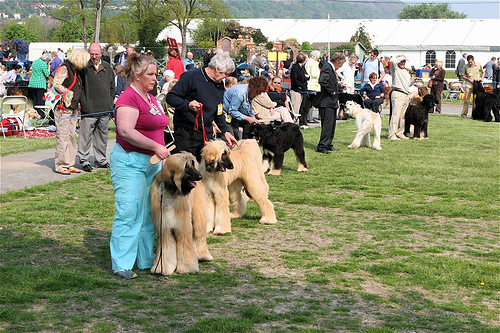

In [7]:
object_name = "n02088094_1045.JPEG"  # The file path in MinIO

read_image_from_minio(bucket_name, object_name)
